In [1]:
# import required libraries for dataframe and visualization
#ignoring warnings
import warnings
warnings.filterwarnings("ignore")
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization

# Import any other libraries you may need
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from scipy.stats import zscore #scale using zscore
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
# when you use 'yellowbrick', you need to install it before (!pip install yellowbrick)
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Loading csv file from: /kaggle.com/datasets/vatsalmavani/spotify-dataset/data_w_genres.csv
w_genres = pd.read_csv("C:/Users/Miki.AsusVivobook/project2/data_w_genres.csv")

# Quick Analysis & Visualization of the dataset

In [3]:
# Use the head function to observe the first five lines of the dataframe
w_genres.head()

genres                                            artists  \
0  ['show tunes']                   "Cats" 1981 Original London Cast   
1              []                          "Cats" 1983 Broadway Cast   
2              []        "Fiddler On The Roof” Motion Picture Chorus   
3              []     "Fiddler On The Roof” Motion Picture Orchestra   
4              []  "Joseph And The Amazing Technicolor Dreamcoat"...   

   acousticness  danceability    duration_ms    energy  instrumentalness  \
0      0.590111      0.467222  250318.555556  0.394003          0.011400   
1      0.862538      0.441731  287280.000000  0.406808          0.081158   
2      0.856571      0.348286  328920.000000  0.286571          0.024593   
3      0.884926      0.425074  262890.962963  0.245770          0.073587   
4      0.510714      0.467143  270436.142857  0.488286          0.009400   

   liveness   loudness  speechiness       tempo   valence  popularity  key  \
0  0.290833 -14.448000     0.210389  117.518111  0.389500   38.333333    5   
1  0.315215 -10.690000     0.176212  103.044154  0.268865   30.576923    5   
2  0.325786 -15.230714     0.118514   77.375857  0.354857   34.857143    0   
3  0.275481 -15.639370     0.123200   88.667630  0.372030   34.851852    0   
4  0.195000 -10.236714     0.098543  122.835857  0.482286   43.000000    5   

   mode  count  
0     1      9  
1     1     26  
2     1      7  
3     1     27  
4     1      7

In [4]:
# See a summary of the data to check for null values
w_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           28680 non-null  object 
 2   acousticness      28680 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       28680 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          28680 non-null  float64
 8   loudness          28680 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        28680 non-null  float64
 13  key               28680 non-null  int64  
 14  mode              28680 non-null  int64  
 15  count             28680 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

<AxesSubplot:>

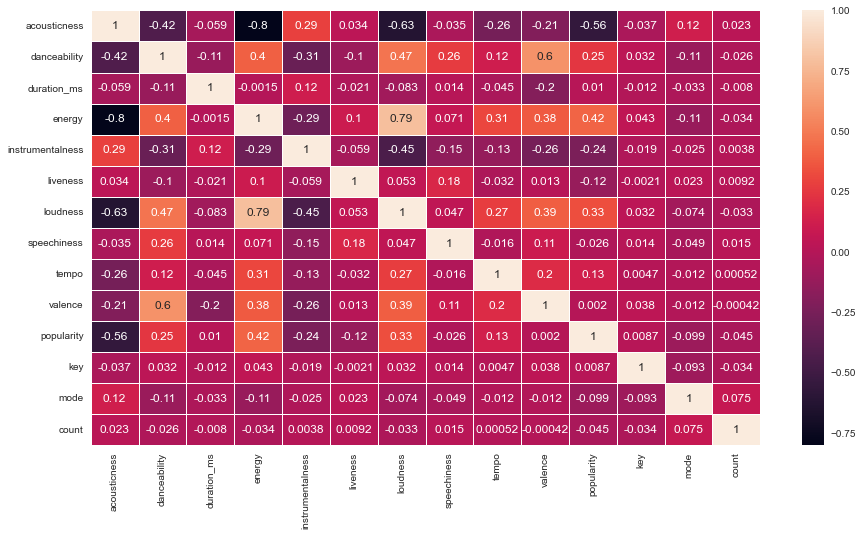

In [7]:
# show the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(data=w_genres.corr(), annot=True, linewidth=.5) # strong correlation loudness x energy, valence x danceability

array([[<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'key'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'count'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

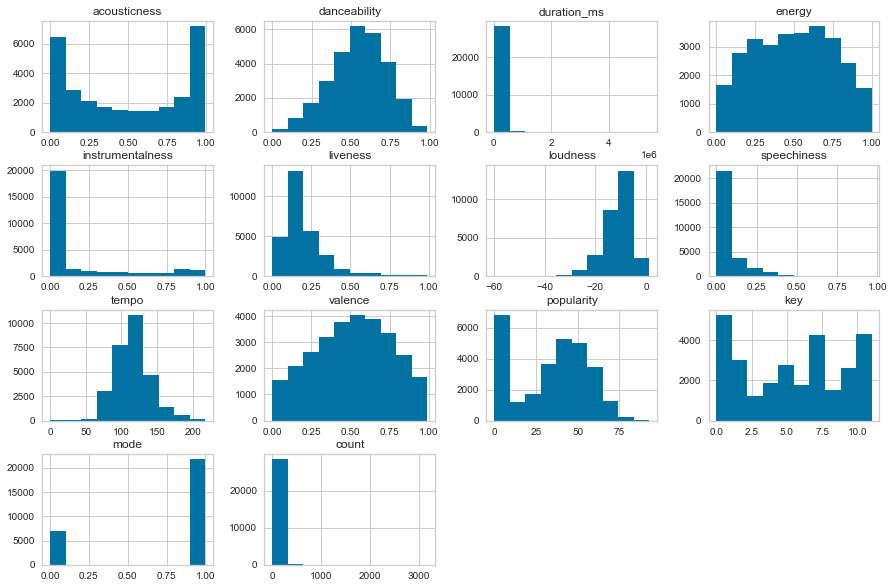

In [8]:
# hist()
w_genres.hist(figsize=(15,10))

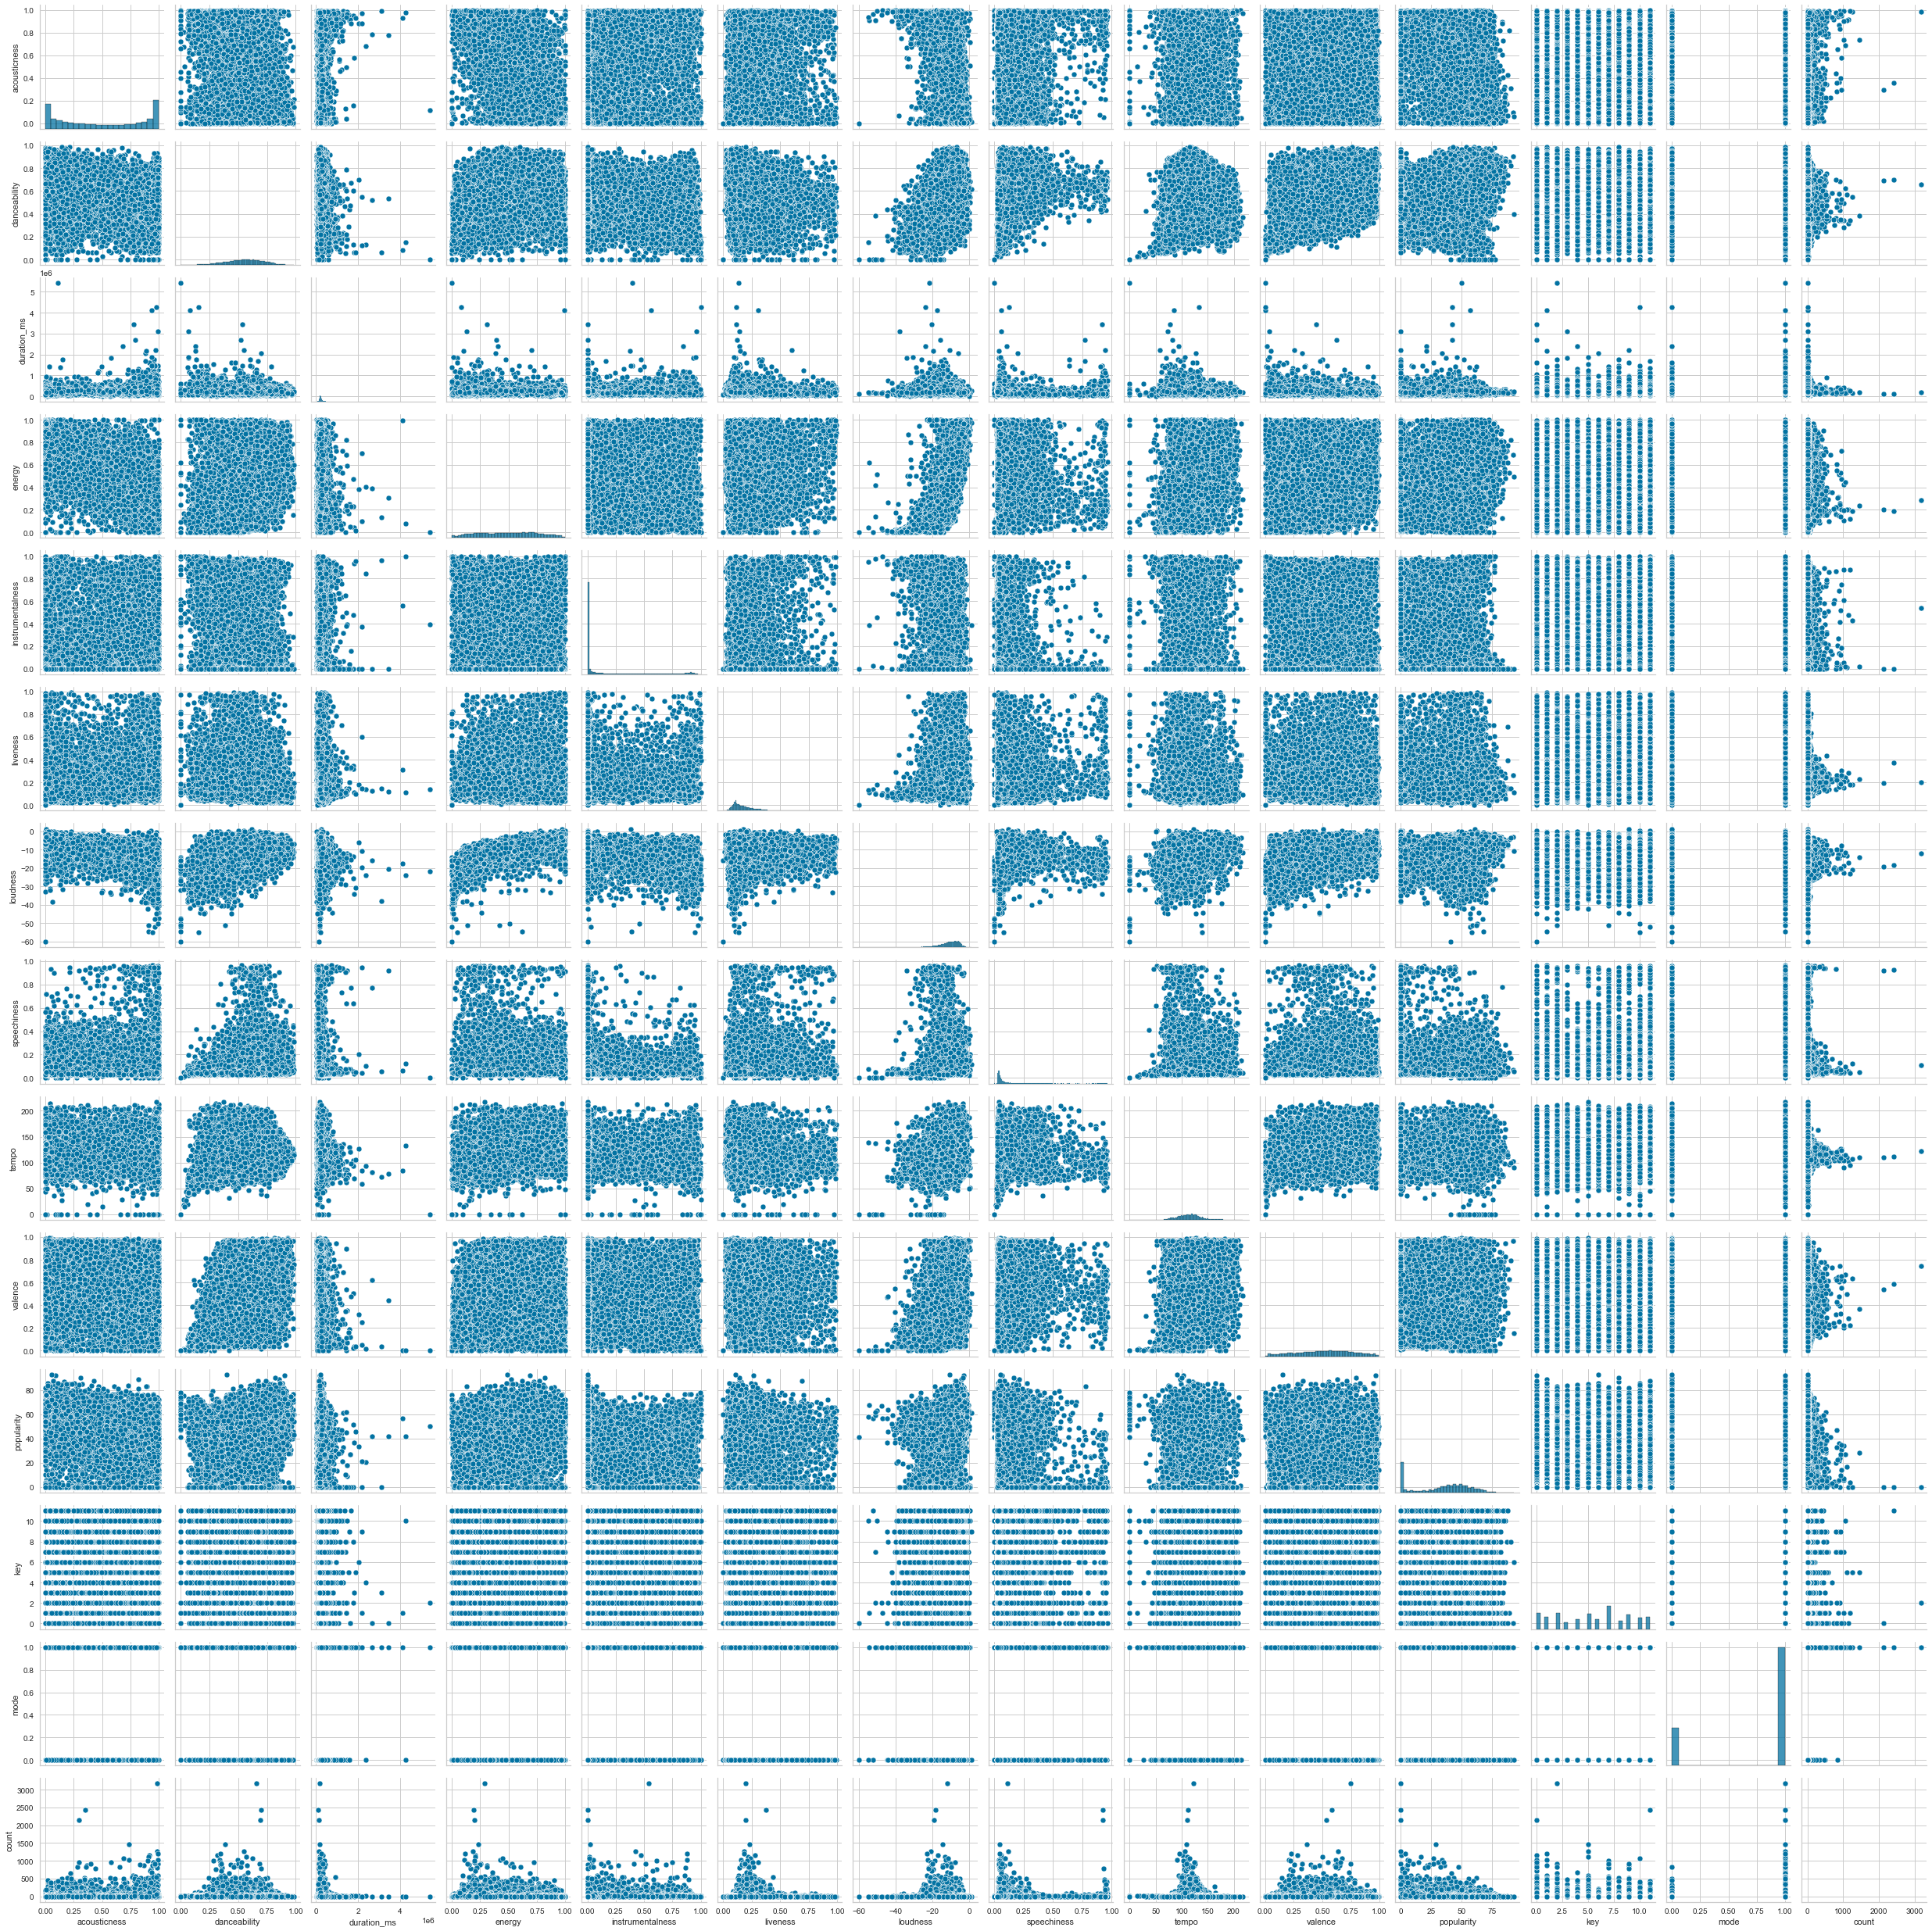

In [9]:
# show the pair plot
sns.pairplot(w_genres)
plt.show()

In [10]:
w_genres["genres"].describe()

count     28680
unique    10743
top          []
freq       9857
Name: genres, dtype: object

In [11]:
w_genres["artists"].describe()

count                                28680
unique                               28680
top       "Cats" 1981 Original London Cast
freq                                     1
Name: artists, dtype: object

In [12]:
w_genres.describe()

acousticness  danceability   duration_ms        energy  \
count  28680.000000  28680.000000  2.868000e+04  28680.000000   
mean       0.498373      0.546490  2.388780e+05      0.497488   
std        0.370614      0.176474  1.211318e+05      0.254885   
min        0.000000      0.000000  1.879550e+04      0.000000   
25%        0.122296      0.431000  1.823304e+05      0.283568   
50%        0.478458      0.557000  2.186400e+05      0.504000   
75%        0.896000      0.675000  2.684670e+05      0.702783   
max        0.996000      0.986000  5.403500e+06      1.000000   

       instrumentalness      liveness      loudness   speechiness  \
count      28680.000000  28680.000000  28680.000000  28680.000000   
mean           0.174756      0.202441    -11.140498      0.094014   
std            0.298406      0.140884      5.771749      0.111986   
min            0.000000      0.000000    -60.000000      0.000000   
25%            0.000004      0.110362    -13.972292      0.039200   
50%            0.001880      0.161000    -10.088938      0.052200   
75%            0.215291      0.247000     -6.889000      0.095300   
max            1.000000      0.991000      1.342000      0.964000   

              tempo       valence    popularity           key          mode  \
count  28680.000000  28680.000000  28680.000000  28680.000000  28680.000000   
mean     115.844830      0.512723     34.060945      5.412901      0.759170   
std       25.003834      0.244421     22.376438      3.480552      0.427595   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       99.366500      0.329000     12.000000      2.000000      1.000000   
50%      115.357400      0.523243     39.000000      6.000000      1.000000   
75%      129.848750      0.703000     51.000000      8.000000      1.000000   
max      217.743000      0.991000     93.000000     11.000000      1.000000   

              count  
count  28680.000000  
mean      13.847211  
std       53.372544  
min        1.000000  
25%        2.000000  
50%        3.000000  
75%        8.000000  
max     3169.000000

In [13]:
w_genres.sort_values('popularity', ascending=False)

genres             artists  \
20966                                    ['bedroom pop']         Ritt Momney   
14354                         ['latin pop', 'viral pop']           Lele Pons   
15070                                                 []     Los Legendarios   
11764  ['cubaton', 'latin', 'pop venezolano', 'reggae...            Jerry Di   
28263                               ['modern indie pop']         salem ilese   
...                                                  ...                 ...   
22856                            ['marathi traditional']      Snehal Bhatkar   
22855                                                 []          Sneeky Dee   
10092                                                 []          Harry Wass   
10093                                                 []      Harsukh Kikani   
9309                                   ['classical era']  Giovanni Paisiello   

       acousticness  danceability    duration_ms    energy  instrumentalness  \
20966      0.056300      0.399000  210463.000000  0.491000          0.000890   
14354      0.090700      0.905000  155825.000000  0.686000          0.000000   
15070      0.310000      0.823000  213314.000000  0.821000          0.000004   
11764      0.819000      0.854000  197587.000000  0.525000          0.000000   
28263      0.424000      0.738000  136839.000000  0.621000          0.000007   
...             ...           ...            ...       ...               ...   
22856      0.765429      0.426571  173225.857143  0.470143          0.001049   
22855      0.355000      0.732500  204770.000000  0.774500          0.000004   
10092      0.935000      0.544000  328627.000000  0.230000          0.000000   
10093      0.994500      0.703500  182901.000000  0.259500          0.419500   
9309       0.987500      0.596000  126366.500000  0.083850          0.000000   

       liveness   loudness  speechiness       tempo  valence  popularity  key  \
20966  0.110000 -10.778000     0.053800   91.066000   0.1510        93.0    6   
14354  0.266000  -3.152000     0.066400  103.013000   0.9630        92.0    0   
15070  0.143000  -3.402000     0.166000   99.999000   0.7910        90.0    8   
11764  0.146000  -4.426000     0.214000   97.054000   0.6300        89.0    1   
28263  0.692000  -7.313000     0.048600  113.968000   0.7150        88.0    0   
...         ...        ...          ...         ...      ...         ...  ...   
22856  0.286814 -10.289286     0.135629   83.211286   0.5410         0.0    2   
22855  0.226525  -6.356750     0.276750  111.939500   0.6805         0.0    7   
10092  0.711000 -25.765000     0.890000  101.340000   0.4010         0.0    2   
10093  0.114000  -8.943000     0.544000  120.519500   0.7370         0.0   11   
9309   0.108500 -18.287000     0.091400  134.830500   0.3905         0.0    6   

       mode  count  
20966     0      2  
14354     1      1  
15070     0      2  
11764     1      2  
28263     1      2  
...     ...    ...  
22856     1      7  
22855     1      8  
10092     1      2  
10093     1      4  
9309      1      2  

[28680 rows x 16 columns]

In [80]:
w_genres.sort_values('count', ascending=False)

genres              artists  \
8367                        ['tango', 'vintage tango']     Francisco Canaro   
28561                                               []     Эрнест Хемингуэй   
28560                                               []    Эрих Мария Ремарк   
8434   ['adult standards', 'easy listening', 'lounge']        Frank Sinatra   
10714                       ['tango', 'vintage tango']      Ignacio Corsini   
...                                                ...                  ...   
15258        ['classical organ', 'french romanticism']         Louis Vierne   
10172                                               []  Hedwig von Debitzka   
10173                                   ['musikkorps']   Heeresmusikkorps 9   
10175                        ['disney', 'movie tunes']    Heidi Mollenhauer   
20545                             ['hardcore hip hop']              Reakwon   

       acousticness  danceability    duration_ms    energy  instrumentalness  \
8367       0.984282      0.659676  176986.345850  0.287555          0.537988   
28561      0.353916      0.696773  115936.962015  0.188971          0.000027   
28560      0.297365      0.693738  121013.185393  0.200289          0.000230   
8434       0.738865      0.385232  189282.134339  0.236152          0.021148   
10714      0.985169      0.545475  154560.711783  0.187842          0.425159   
...             ...           ...            ...       ...               ...   
15258      0.764000      0.102000  282502.000000  0.132000          0.707000   
10172      0.992000      0.342000  253993.000000  0.127000          0.067300   
10173      0.966000      0.668000  163835.000000  0.482000          0.000071   
10175      0.928000      0.182000  225293.000000  0.058900          0.000246   
20545      0.115000      0.709000  310573.000000  0.740000          0.000000   

       liveness   loudness  speechiness       tempo   valence  popularity  \
8367   0.199492 -12.043738     0.110533  122.743169  0.745212    0.061849   
28561  0.373329 -18.237630     0.926229  111.847911  0.583885    0.066061   
28560  0.195630 -19.259112     0.921277  110.717091  0.536381    0.000000   
8434   0.230828 -14.335969     0.049029  109.394801  0.364991   28.658670   
10714  0.182707 -20.862591     0.121051  106.514583  0.638670    0.031847   
...         ...        ...          ...         ...       ...         ...   
15258  0.140000 -26.459000     0.041800   87.751000  0.057700    0.000000   
10172  0.123000 -16.270000     0.054400   80.217000  0.180000    0.000000   
10173  0.254000  -8.016000     0.029700  112.902000  0.695000   27.000000   
10175  0.073000 -24.502000     0.038200   74.232000  0.128000   47.000000   
20545  0.145000  -6.476000     0.434000   98.141000  0.529000   47.000000   

       key  mode  count  
8367     2     1   3169  
28561   11     1   2422  
28560    0     1   2136  
8434     5     1   1459  
10714    5     1   1256  
...    ...   ...    ...  
15258    9     1      1  
10172    0     1      1  
10173    3     1      1  
10175    5     1      1  
20545    7     1      1  

[28680 rows x 16 columns]

# Preparation & Cleaning for KMeans Clustering Model

In [15]:
# create a copy of the dataset w_genres and get 700 data
df_small3 = w_genres.copy()
df_small3 = df_small3.iloc[:700]

In [16]:
# write to a csv file
df_small3.to_csv('df_small3.csv', index=0)

In [17]:
df_small3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            700 non-null    object 
 1   artists           700 non-null    object 
 2   acousticness      700 non-null    float64
 3   danceability      700 non-null    float64
 4   duration_ms       700 non-null    float64
 5   energy            700 non-null    float64
 6   instrumentalness  700 non-null    float64
 7   liveness          700 non-null    float64
 8   loudness          700 non-null    float64
 9   speechiness       700 non-null    float64
 10  tempo             700 non-null    float64
 11  valence           700 non-null    float64
 12  popularity        700 non-null    float64
 13  key               700 non-null    int64  
 14  mode              700 non-null    int64  
 15  count             700 non-null    int64  
dtypes: float64(11), int64(3), object(2)
memory u

In [29]:
# create X3 without 'genres', 'artists', 'duration_ms', 'key', 'mode' and 'count' (those are objects or no contribution features)
X3 = pd.DataFrame(df_small3.iloc[:, [2,3,5,6,7,8,9,10,11,12]].values)
col3 = df_small3.iloc[:, [2,3,5,6,7,8,9,10,11,12]].columns
X3.columns = col3
X3.head()

acousticness  danceability    energy  instrumentalness  liveness  \
0      0.590111      0.467222  0.394003          0.011400  0.290833   
1      0.862538      0.441731  0.406808          0.081158  0.315215   
2      0.856571      0.348286  0.286571          0.024593  0.325786   
3      0.884926      0.425074  0.245770          0.073587  0.275481   
4      0.510714      0.467143  0.488286          0.009400  0.195000   

    loudness  speechiness       tempo   valence  popularity  
0 -14.448000     0.210389  117.518111  0.389500   38.333333  
1 -10.690000     0.176212  103.044154  0.268865   30.576923  
2 -15.230714     0.118514   77.375857  0.354857   34.857143  
3 -15.639370     0.123200   88.667630  0.372030   34.851852  
4 -10.236714     0.098543  122.835857  0.482286   43.000000

In [30]:
X3.shape

(700, 10)

array([[<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'popularity'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

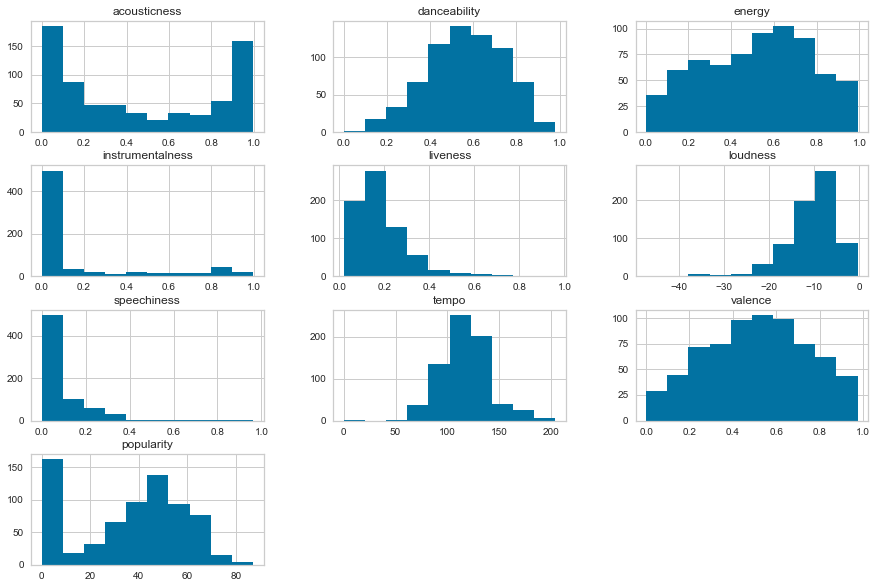

In [31]:
X3.hist(figsize=(15,10))

In [32]:
# preprocessing (Transform features by scaling each feature to a given range.)
scaler = StandardScaler()

scaled3 = pd.DataFrame(scaler.fit_transform(X3))
scaled3.columns = col3
scaled3.head(10)

acousticness  danceability    energy  instrumentalness  liveness  loudness  \
0      0.360581     -0.548384 -0.498518         -0.538027  0.840906 -0.668633   
1      1.085733     -0.692174 -0.447663         -0.301026  1.045723 -0.022796   
2      1.069850     -1.219268 -0.925205         -0.493204  1.134516 -0.803148   
3      1.145325     -0.786129 -1.087254         -0.326748  0.711946 -0.873378   
4      0.149241     -0.548832 -0.124057         -0.544820  0.035878  0.055104   
5      0.412339     -0.435257 -0.832529         -0.560804  0.705941 -1.324849   
6      0.719631      0.409278 -0.029871          0.055170  1.976346 -1.728473   
7      1.257318      0.956425 -0.180795         -0.317871  4.588839  0.002295   
8     -0.749307      0.554734  0.698512         -0.576588 -0.248879  0.135535   
9      0.239084      1.271175  0.053270         -0.498403 -0.087607  0.241989   

   speechiness     tempo   valence  popularity  
0     1.055166  0.005958 -0.522237    0.107812  
1     0.729092 -0.611264 -1.037482   -0.228010  
2     0.178623 -1.705852 -0.670201   -0.042693  
3     0.223328 -1.224330 -0.596855   -0.042923  
4    -0.011917  0.232725 -0.125938    0.309860  
5    -0.016884  0.054180 -0.299902   -0.132722  
6     1.051456  0.743730  1.594102   -1.551872  
7     1.490325  0.657120  1.666711   -1.421983  
8    -0.145551  0.667491  1.023243   -0.069868  
9     1.849880 -0.214651 -0.132711    1.372058

In [33]:
# Use apply(zscore) to make sure that X3(with StandardScaler()) and zscore are the same.
X3_scaled_z =X3.apply(zscore)
X3_scaled_z.head(10)

acousticness  danceability    energy  instrumentalness  liveness  loudness  \
0      0.360581     -0.548384 -0.498518         -0.538027  0.840906 -0.668633   
1      1.085733     -0.692174 -0.447663         -0.301026  1.045723 -0.022796   
2      1.069850     -1.219268 -0.925205         -0.493204  1.134516 -0.803148   
3      1.145325     -0.786129 -1.087254         -0.326748  0.711946 -0.873378   
4      0.149241     -0.548832 -0.124057         -0.544820  0.035878  0.055104   
5      0.412339     -0.435257 -0.832529         -0.560804  0.705941 -1.324849   
6      0.719631      0.409278 -0.029871          0.055170  1.976346 -1.728473   
7      1.257318      0.956425 -0.180795         -0.317871  4.588839  0.002295   
8     -0.749307      0.554734  0.698512         -0.576588 -0.248879  0.135535   
9      0.239084      1.271175  0.053270         -0.498403 -0.087607  0.241989   

   speechiness     tempo   valence  popularity  
0     1.055166  0.005958 -0.522237    0.107812  
1     0.729092 -0.611264 -1.037482   -0.228010  
2     0.178623 -1.705852 -0.670201   -0.042693  
3     0.223328 -1.224330 -0.596855   -0.042923  
4    -0.011917  0.232725 -0.125938    0.309860  
5    -0.016884  0.054180 -0.299902   -0.132722  
6     1.051456  0.743730  1.594102   -1.551872  
7     1.490325  0.657120  1.666711   -1.421983  
8    -0.145551  0.667491  1.023243   -0.069868  
9     1.849880 -0.214651 -0.132711    1.372058

In [34]:
scaled3 = scaler.fit_transform(X3)

Elbow Method

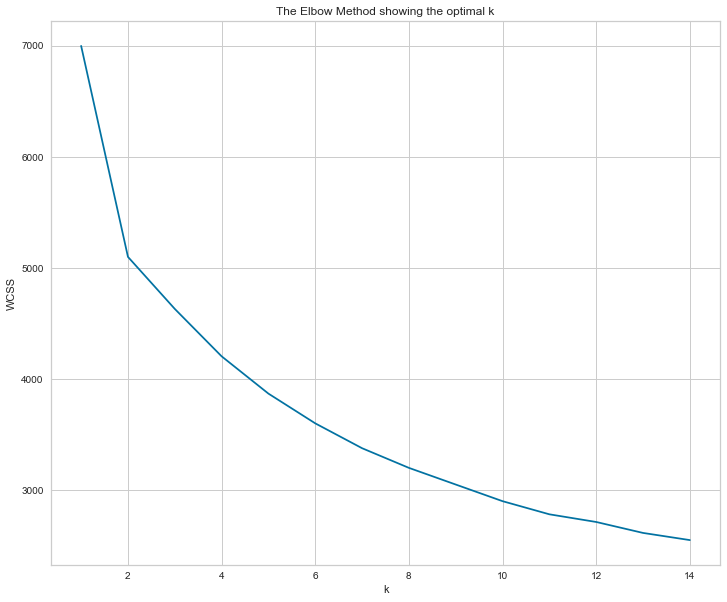

In [35]:
# Elbow method WCSS (Within-Cluster Sum of Square)
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,10))
plt.plot(range(1,15), wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

silhouette score

For n_clusters = 2, the average silhouette score is 0.2794263076308458)
For n_clusters = 3, the average silhouette score is 0.216053483594239)
For n_clusters = 4, the average silhouette score is 0.19760637554032176)
For n_clusters = 5, the average silhouette score is 0.1577921133422683)
For n_clusters = 6, the average silhouette score is 0.15884527714633284)
For n_clusters = 7, the average silhouette score is 0.1634827759569263)
For n_clusters = 8, the average silhouette score is 0.16675735420653387)
For n_clusters = 9, the average silhouette score is 0.17112779414460802)


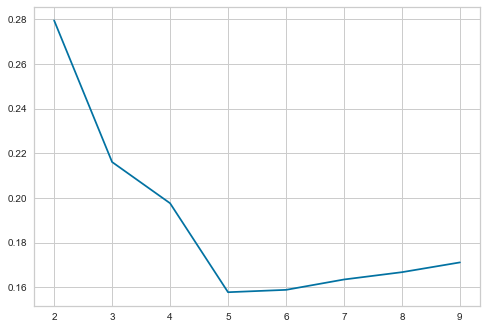

In [36]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((scaled3))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(scaled3, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the average silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

Visualize clusters silhouettes

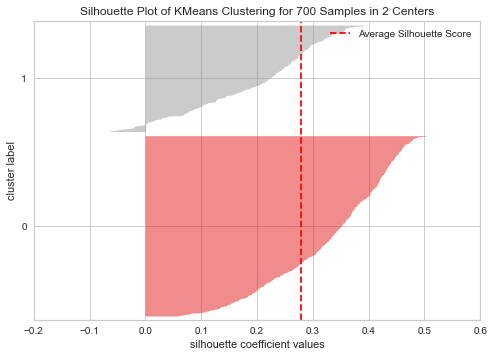

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 700 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [37]:
# finding optimal no. of clusters with silhouette coefficients k=2
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(scaled3)
visualizer.show()

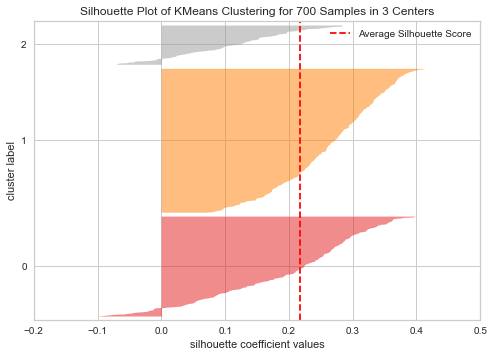

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 700 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [38]:
# finding optimal no. of clusters with silhouette coefficients k=3
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(scaled3)
visualizer.show()

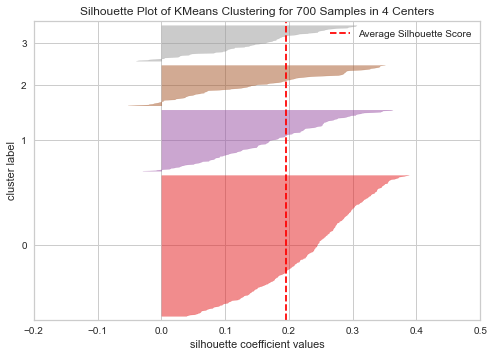

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 700 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [39]:
# finding optimal no. of clusters with silhouette coefficients k=4
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(scaled3)
visualizer.show()

Closer to +1 score is better. 
If the score is close to minus, the cluster is possiblely incorrect.
Every cluster should pass the average silhouette score.
The silhouette score is measured how well the clusters are separated. So, if there is only 1 cluster, it's not measurable. Also, the smaller number of clusters could get higher score (that's why in the most cases, 2 clusters can get higher score).  


In [40]:
#since we are going to compare our results for different ks, lets make different
#dataframes for each k
k2_df = df_small3.copy()
scaled_k2_df = scaled3.copy()

k3_df = df_small3.copy()
scaled_k3_df = scaled3.copy()

k4_df = df_small3.copy()
scaled_k4_df = scaled3.copy()


KMeans Clustering Model (K=2)

In [41]:
km2 = KMeans(n_clusters = 2, random_state = 1)

# inspect parameters
km2.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'random_state': 1,
 'tol': 0.0001,
 'verbose': 0}

In [42]:
y_km2 = km2.fit_predict(scaled_k2_df)

In [43]:
clusters = km2.cluster_centers_

In [44]:
km2.cluster_centers_

array([[-0.66030491,  0.39476515,  0.60171287, -0.29569319, -0.11804078,
         0.51611894,  0.08447513,  0.21967248,  0.19367626,  0.43398612],
       [ 1.11743908, -0.6680641 , -1.01828332,  0.50040387,  0.19976131,
        -0.87343206, -0.14295792, -0.37175342, -0.32775983, -0.73443806]])

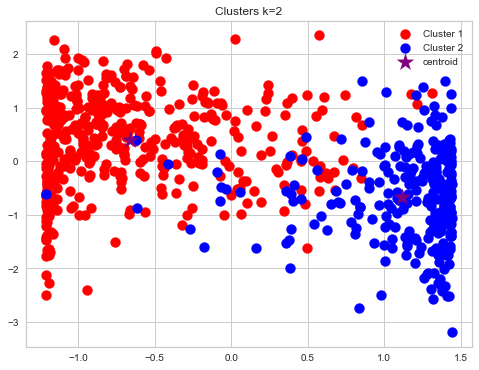

In [45]:
# visualization

fig, ax = plt.subplots(figsize = (8, 6))

plt.scatter(scaled_k2_df[y_km2 == 0,0], scaled_k2_df[y_km2 == 0,1], s = 100, color = 'red', label = 'Cluster 1')
plt.scatter(scaled_k2_df[y_km2 == 1,0], scaled_k2_df[y_km2 == 1,1], s = 100, color = 'blue', label = 'Cluster 2')




# Add the centroids to the plot 
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1], s = 300, color='purple',marker='*',label='centroid')
plt.title('Clusters k=2')
plt.legend()
plt.show()

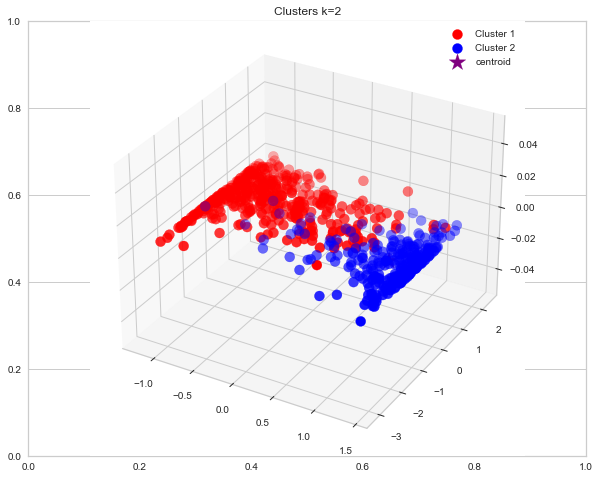

In [46]:
# visualization 3D (line2: if you include rotation)
# %matplotlib notebook 

fig, ax = plt.subplots(figsize = (10, 8))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(scaled_k2_df[y_km2 == 0,0], scaled_k2_df[y_km2 == 0,1], s = 100, color = 'red', label = 'Cluster 1')
plt.scatter(scaled_k2_df[y_km2 == 1,0], scaled_k2_df[y_km2 == 1,1], s = 100, color = 'blue', label = 'Cluster 2')


# Add the centroids to the plot 
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1], s = 300, color='purple',marker='*',label='centroid')
plt.title('Clusters k=2')
plt.legend()
plt.show()

KMeans Clustering Model (K=3)

In [47]:
km3 = KMeans(n_clusters = 3, random_state = 1)

# inspect parameters
km3.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': 1,
 'tol': 0.0001,
 'verbose': 0}

In [48]:
y_km3 = km3.fit_predict(scaled_k3_df)
clusters = km3.cluster_centers_
km3.cluster_centers_

array([[ 1.12623294, -0.70742067, -1.04095664,  0.54426657,  0.14990673,
        -0.89887383, -0.29126771, -0.40478452, -0.36495995, -0.73483634],
       [-0.65629028,  0.21567461,  0.63268605, -0.24850073, -0.22812891,
         0.51471725, -0.3239847 ,  0.2913008 ,  0.16576652,  0.40944145],
       [-0.45917729,  1.00982212,  0.32866038, -0.4738926 ,  0.45553535,
         0.39981954,  1.93073896, -0.038364  ,  0.32095079,  0.36848888]])

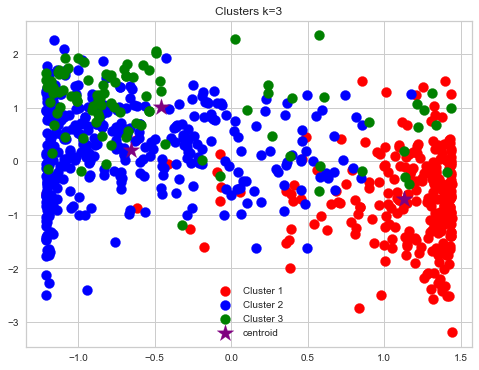

In [49]:
# visualization

fig, ax = plt.subplots(figsize = (8, 6))

plt.scatter(scaled_k3_df[y_km3 == 0,0], scaled_k3_df[y_km3 == 0,1], s = 100, color = 'red', label = 'Cluster 1')
plt.scatter(scaled_k3_df[y_km3 == 1,0], scaled_k3_df[y_km3 == 1,1], s = 100, color = 'blue', label = 'Cluster 2')
plt.scatter(scaled_k3_df[y_km3 == 2,0], scaled_k3_df[y_km3 == 2,1], s = 100, color = 'green', label = 'Cluster 3')



# Add the centroids to the plot 
plt.scatter(km3.cluster_centers_[:,0],km3.cluster_centers_[:,1], s = 300, color='purple',marker='*',label='centroid')
plt.title('Clusters k=3')
plt.legend()
plt.show()

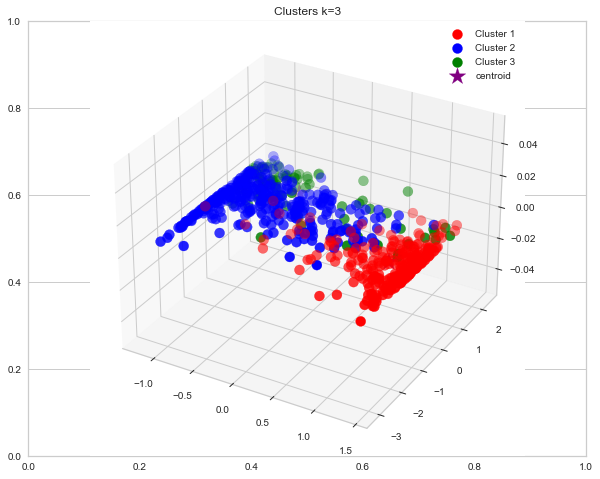

In [50]:
# visualization 3D (line2: include rotation)
# %matplotlib notebook 
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(figsize = (10, 8))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(scaled_k3_df[y_km3 == 0,0], scaled_k3_df[y_km3 == 0,1], s = 100, color = 'red', label = 'Cluster 1')
plt.scatter(scaled_k3_df[y_km3 == 1,0], scaled_k3_df[y_km3 == 1,1], s = 100, color = 'blue', label = 'Cluster 2')
plt.scatter(scaled_k3_df[y_km3 == 2,0], scaled_k3_df[y_km3 == 2,1], s = 100, color = 'green', label = 'Cluster 3')



# Add the centroids to the plot 
plt.scatter(km3.cluster_centers_[:,0],km3.cluster_centers_[:,1], s = 300, color='purple',marker='*',label='centroid')
plt.title('Clusters k=3')
plt.legend()
plt.show()

KMeans Clustering Model (K=4)

In [51]:
km4 = KMeans(n_clusters = 4, random_state = 1)

# inspect parameters
km4.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'random_state': 1,
 'tol': 0.0001,
 'verbose': 0}

In [52]:
y_km4 = km4.fit_predict(scaled_k4_df)
clusters = km4.cluster_centers_
km4.cluster_centers_

array([[-0.65502953,  0.21148593,  0.62265144, -0.24835192, -0.24755475,
         0.50367818, -0.33089492,  0.28133259,  0.15383405,  0.42918816],
       [ 1.06319154, -0.32220237, -0.73530969,  0.21939681,  0.61268834,
        -0.39874294, -0.07937066, -0.18558807,  0.31089921, -1.18262543],
       [ 1.19335518, -1.14827162, -1.40682245,  0.97486168, -0.36101165,
        -1.53571328, -0.47246498, -0.63805945, -1.1991225 , -0.15642839],
       [-0.59525856,  1.02085392,  0.4034997 , -0.50340468,  0.33448407,
         0.44163434,  1.97279234, -0.06587902,  0.22194182,  0.51274893]])

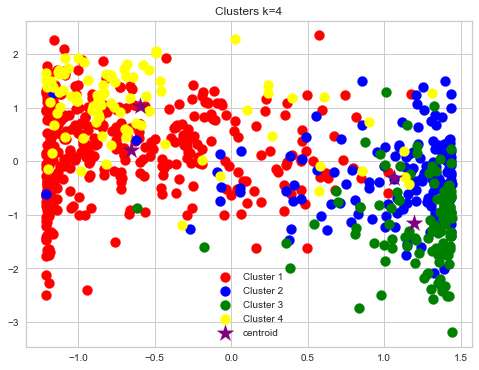

In [53]:
# visualization

fig, ax = plt.subplots(figsize = (8, 6))

plt.scatter(scaled_k4_df[y_km4 == 0,0], scaled_k4_df[y_km4 == 0,1], s = 100, color = 'red', label = 'Cluster 1')
plt.scatter(scaled_k4_df[y_km4 == 1,0], scaled_k4_df[y_km4 == 1,1], s = 100, color = 'blue', label = 'Cluster 2')
plt.scatter(scaled_k4_df[y_km4 == 2,0], scaled_k4_df[y_km4 == 2,1], s = 100, color = 'green', label = 'Cluster 3')
plt.scatter(scaled_k4_df[y_km4 == 3,0], scaled_k4_df[y_km4 == 3,1], s = 100, color = 'yellow', label = 'Cluster 4')


# Add the centroids to the plot 
plt.scatter(km4.cluster_centers_[:,0],km4.cluster_centers_[:,1], s = 300, color='purple',marker='*',label='centroid')
plt.title('Clusters k=4')
plt.legend()
plt.show()

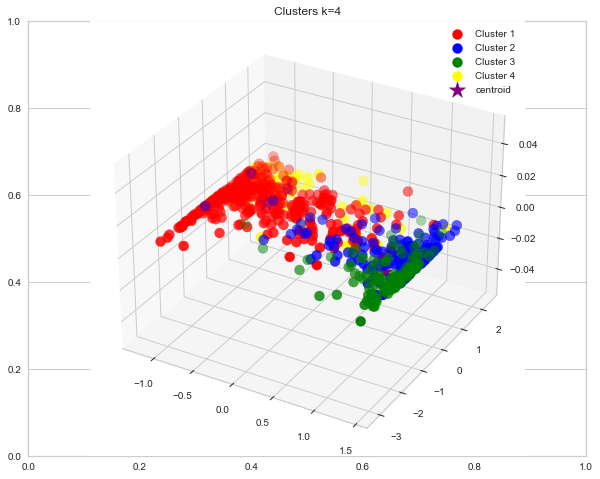

In [54]:
# visualization 3D (line2: include rotation)
# %matplotlib notebook 
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(figsize = (10, 8))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(scaled_k4_df[y_km4 == 0,0], scaled_k4_df[y_km4 == 0,1], s = 100, color = 'red', label = 'Cluster 1')
plt.scatter(scaled_k4_df[y_km4 == 1,0], scaled_k4_df[y_km4 == 1,1], s = 100, color = 'blue', label = 'Cluster 2')
plt.scatter(scaled_k4_df[y_km4 == 2,0], scaled_k4_df[y_km4 == 2,1], s = 100, color = 'green', label = 'Cluster 3')
plt.scatter(scaled_k4_df[y_km4 == 3,0], scaled_k4_df[y_km4 == 3,1], s = 100, color = 'yellow', label = 'Cluster 4')


# Add the centroids to the plot 
plt.scatter(km4.cluster_centers_[:,0],km4.cluster_centers_[:,1], s = 300, color='purple',marker='*',label='centroid')
plt.title('Clusters k=4')
plt.legend()
plt.show()


Although the cluster with K=2 is well separated, the cluster with K=3 might be worth to investigate. Let's investigate the cluster with K=3 more in detail. First, we concatenate the cluster's numbers to the original dataframe (df_small3).

In [55]:

y_km3

array([0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 2, 2, 2,
       1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 2, 0, 1, 0, 1,
       2, 1, 2, 0, 2, 0, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 0, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2,
       1, 0, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       2, 0, 0, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [59]:
# make df with y_km3
kmeans3 = pd.DataFrame(data=y_km3, dtype=int)
kmeans3.columns = ['cluster_index']

kmeans3.shape

(700, 1)

In [60]:
kmeans3.head(10)

cluster_index
0              0
1              0
2              0
3              0
4              1
5              0
6              0
7              2
8              1
9              2

In [62]:
# count numbers of the cluster_index
kmeans3['cluster_index'].value_counts()

1    356
0    247
2     97
Name: cluster_index, dtype: int64

In [66]:
# concatenate the cluster_index column to the dataframe (df_small3)
df_small3 = pd.concat([df_small3, kmeans3], axis = 1)

df_small3.head(10)

genres  \
0                                     ['show tunes']   
1                                                 []   
2                                                 []   
3                                                 []   
4                                                 []   
5                                                 []   
6                                                 []   
7                                                 []   
8                 ['comedy rock', 'comic', 'parody']   
9  ['emo rap', 'florida rap', 'sad rap', 'undergr...   

                                             artists  acousticness  \
0                   "Cats" 1981 Original London Cast      0.590111   
1                          "Cats" 1983 Broadway Cast      0.862538   
2        "Fiddler On The Roof” Motion Picture Chorus      0.856571   
3     "Fiddler On The Roof” Motion Picture Orchestra      0.884926   
4  "Joseph And The Amazing Technicolor Dreamcoat"...      0.510714   
5  "Joseph And The Amazing Technicolor Dreamcoat"...      0.609556   
6                             "Mama" Helen Teagarden      0.725000   
7                            "Test for Victor Young"      0.927000   
8                                "Weird Al" Yankovic      0.173145   
9                                               $NOT      0.544467   

   danceability    duration_ms    energy  instrumentalness  liveness  \
0      0.467222  250318.555556  0.394003          0.011400  0.290833   
1      0.441731  287280.000000  0.406808          0.081158  0.315215   
2      0.348286  328920.000000  0.286571          0.024593  0.325786   
3      0.425074  262890.962963  0.245770          0.073587  0.275481   
4      0.467143  270436.142857  0.488286          0.009400  0.195000   
5      0.487278  205091.944444  0.309906          0.004696  0.274767   
6      0.637000  135533.000000  0.512000          0.186000  0.426000   
7      0.734000  175693.000000  0.474000          0.076200  0.737000   
8      0.662787  218948.196721  0.695393          0.000050  0.161102   
9      0.789800  137910.466667  0.532933          0.023063  0.180300   

    loudness  speechiness       tempo   valence  popularity  key  mode  count  \
0 -14.448000     0.210389  117.518111  0.389500   38.333333    5     1      9   
1 -10.690000     0.176212  103.044154  0.268865   30.576923    5     1     26   
2 -15.230714     0.118514   77.375857  0.354857   34.857143    0     1      7   
3 -15.639370     0.123200   88.667630  0.372030   34.851852    0     1     27   
4 -10.236714     0.098543  122.835857  0.482286   43.000000    5     1      7   
5 -18.266389     0.098022  118.648944  0.441556   32.777778    5     1     36   
6 -20.615000     0.210000  134.819000  0.885000    0.000000    8     1      2   
7 -10.544000     0.256000  132.788000  0.902000    3.000000   10     1      2   
8  -9.768705     0.084536  133.031180  0.751344   34.229508    9     1    122   
9  -9.149267     0.293687  112.344800  0.480700   67.533333    1     1     15   

   cluster_index  
0              0  
1              0  
2              0  
3              0  
4              1  
5              0  
6              0  
7              2  
8              1  
9              2

In [67]:
# 10 examples of the songs in the cluster_index 0 (cluster 1 red)
df_small3.loc[df_small3['cluster_index'] == 0][: 10]

genres  \
0                                      ['show tunes']   
1                                                  []   
2                                                  []   
3                                                  []   
5                                                  []   
6                                                  []   
18  ['experimental hip hop', 'indie r&b', 'indie s...   
32  ['adult standards', 'ballroom', 'easy listenin...   
36                            ['classical piano duo']   
40                                                 []   

                                              artists  acousticness  \
0                    "Cats" 1981 Original London Cast      0.590111   
1                           "Cats" 1983 Broadway Cast      0.862538   
2         "Fiddler On The Roof” Motion Picture Chorus      0.856571   
3      "Fiddler On The Roof” Motion Picture Orchestra      0.884926   
5   "Joseph And The Amazing Technicolor Dreamcoat"...      0.609556   
6                              "Mama" Helen Teagarden      0.725000   
18                                          ((( O )))      0.847000   
32                              101 Strings Orchestra      0.588875   
36                                        12 Pianists      0.991000   
40                                      1776 Ensemble      0.891500   

    danceability    duration_ms    energy  instrumentalness  liveness  \
0       0.467222  250318.555556  0.394003          0.011400  0.290833   
1       0.441731  287280.000000  0.406808          0.081158  0.315215   
2       0.348286  328920.000000  0.286571          0.024593  0.325786   
3       0.425074  262890.962963  0.245770          0.073587  0.275481   
5       0.487278  205091.944444  0.309906          0.004696  0.274767   
6       0.637000  135533.000000  0.512000          0.186000  0.426000   
18      0.410000  311837.000000  0.169000          0.003270  0.117000   
32      0.292525  173106.375000  0.397000          0.714538  0.195375   
36      0.414000  137733.000000  0.018700          0.892000  0.051300   
40      0.589500  193206.500000  0.402500          0.000000  0.472500   

     loudness  speechiness       tempo   valence  popularity  key  mode  \
0  -14.448000     0.210389  117.518111  0.389500   38.333333    5     1   
1  -10.690000     0.176212  103.044154  0.268865   30.576923    5     1   
2  -15.230714     0.118514   77.375857  0.354857   34.857143    0     1   
3  -15.639370     0.123200   88.667630  0.372030   34.851852    0     1   
5  -18.266389     0.098022  118.648944  0.441556   32.777778    5     1   
6  -20.615000     0.210000  134.819000  0.885000    0.000000    8     1   
18 -11.422000     0.048500   89.494000  0.208000   67.000000    3     1   
32 -13.496375     0.037975  100.623125  0.391525   27.000000    0     1   
36 -39.385000     0.055700   74.477000  0.195000   52.000000    7     1   
40 -11.348500     0.172000   97.403500  0.594000   23.000000    0     1   

    count  cluster_index  
0       9              0  
1      26              0  
2       7              0  
3      27              0  
5      36              0  
6       2              0  
18      2              0  
32     16              0  
36      2              0  
40      2              0

Cluster 1 (red) seems classical / musical songs

In [68]:
# 10 examples of the songs in the cluster_index 1 (cluster 2 blue)
df_small3.loc[df_small3['cluster_index'] == 1][: 10]

genres  \
4                                                  []   
8                  ['comedy rock', 'comic', 'parody']   
11                                                 []   
13  ['dark trap', 'new orleans rap', 'underground ...   
14                         ['broadway', 'show tunes']   
17  ['boston rock', 'dance rock', 'new romantic', ...   
19                                                 []   
20                      ['k-pop', 'k-pop girl group']   
21  ['alternative metal', 'industrial metal', 'nu ...   
22        ['boy band', 'dance pop', 'europop', 'pop']   

                                              artists  acousticness  \
4   "Joseph And The Amazing Technicolor Dreamcoat"...      0.510714   
8                                 "Weird Al" Yankovic      0.173145   
11                                              $pyda      0.000122   
13                                        $uicideBoy$      0.141485   
14         'In The Heights' Original Broadway Company      0.624769   
17                                       'Til Tuesday      0.105556   
19             (Con La Participación de Marc Anthony)      0.538000   
20                                           (G)I-DLE      0.011235   
21                                         (Hed) P.E.      0.011631   
22                                             *NSYNC      0.191611   

    danceability    duration_ms    energy  instrumentalness  liveness  \
4       0.467143  270436.142857  0.488286          0.009400  0.195000   
8       0.662787  218948.196721  0.695393          0.000050  0.161102   
11      0.514000  331240.000000  0.899000          0.079300  0.367000   
13      0.749344  146386.392000  0.635552          0.045675  0.202253   
14      0.563615  314023.615385  0.457692          0.000009  0.204385   
17      0.557125  255213.500000  0.612250          0.023300  0.127587   
19      0.731000  361440.000000  0.794000          0.000024  0.073600   
20      0.640500  196969.000000  0.800000          0.000000  0.252000   
21      0.589200  253677.400000  0.879200          0.000002  0.171120   
22      0.608743  236775.152381  0.694429          0.002703  0.202860   

     loudness  speechiness       tempo   valence  popularity  key  mode  \
4  -10.236714     0.098543  122.835857  0.482286   43.000000    5     1   
8   -9.768705     0.084536  133.031180  0.751344   34.229508    9     1   
11  -5.115000     0.060200  174.028000  0.266000   59.000000    7     1   
13  -6.631304     0.156108  115.022024  0.287286   61.800000    1     1   
14  -8.338462     0.152454  117.006846  0.467538   47.692308    7     1   
17  -9.638125     0.032150  103.080250  0.532625   34.625000    0     1   
19  -4.182000     0.040800   88.003000  0.873000   43.000000    5     1   
20  -4.473500     0.048750  151.013250  0.375000   79.250000    1     0   
21  -5.259800     0.172140  134.969400  0.427000   45.800000    2     1   
22  -6.273800     0.057138  115.615886  0.564781   45.371429    0     1   

    count  cluster_index  
4       7              1  
8     122              1  
11      1              1  
13    125              1  
14     13              1  
17     16              1  
19      2              1  
20      4              1  
21     10              1  
22    105              1

In [ ]:
cluster 2 (blue) seems rock / dance pop.

In [69]:
# 10 examples of the songs in the cluster_index 2 (cluster 3 green)
df_small3.loc[df_small3['cluster_index'] == 2][: 10]

genres  \
7                                                  []   
9   ['emo rap', 'florida rap', 'sad rap', 'undergr...   
10                          ['dark trap', 'meme rap']   
12  ['asian american hip hop', 'cali rap', 'west c...   
15            ['broadway', 'hollywood', 'show tunes']   
16                                     ['show tunes']   
31                         ['glitchcore', 'hyperpop']   
34             ['g funk', 'hyphy', 'west coast trap']   
39                                                 []   
46  ['atl hip hop', 'gangster rap', 'hip hop', 'po...   

                          artists  acousticness  danceability    duration_ms  \
7         "Test for Victor Young"      0.927000      0.734000  175693.000000   
9                            $NOT      0.544467      0.789800  137910.466667   
10                    $atori Zoom      0.239000      0.883000  141519.000000   
12                   $tupid Young      0.148100      0.854000  190572.000000   
15      'Legally Blonde' Ensemble      0.553889      0.648444  304211.888889   
16  'Legally Blonde' Greek Chorus      0.604500      0.773500  361780.000000   
31                       100 gecs      0.158450      0.619250  126605.250000   
34                           11/5      0.270000      0.929000  182373.000000   
39                           1422      0.670000      0.466333   42615.000000   
46                       2 Chainz      0.135493      0.749315  235681.519685   

      energy  instrumentalness  liveness   loudness  speechiness       tempo  \
7   0.474000          0.076200  0.737000 -10.544000     0.256000  132.788000   
9   0.532933          0.023063  0.180300  -9.149267     0.293687  112.344800   
10  0.625000          0.000000  0.076500  -4.098000     0.245000  126.677000   
12  0.683000          0.000002  0.188500  -6.997000     0.221000  100.724500   
15  0.441111          0.000025  0.214667 -11.459778     0.495111  114.808444   
16  0.309500          0.000000  0.222200 -12.669000     0.289000  105.700000   
31  0.595750          0.000000  0.371750  -6.588000     0.212500  114.874750   
34  0.661000          0.000002  0.087900  -6.794000     0.171000  114.973000   
39  0.874667          0.117568  0.391000  -4.884000     0.216633   98.253667   
46  0.650291          0.000507  0.218785  -6.109748     0.222076  130.113772   

     valence  popularity  key  mode  count  cluster_index  
7   0.902000    3.000000   10     1      2              2  
9   0.480700   67.533333    1     1     15              2  
10  0.871000   67.000000    6     1      2              2  
12  0.625500   57.500000    1     1      2              2  
15  0.524778   48.666667    2     1      9              2  
16  0.596500   48.000000   10     1      2              2  
31  0.781250   68.000000    6     1      4              2  
34  0.708000   37.000000    1     0      2              2  
39  0.658333   32.000000    7     0      6              2  
46  0.496820   57.023622    1     1    127              2

cluster 3 (green) seems hiphop / rap

In [75]:
# create a copy dataframe
cluster3_df = df_small3.copy()
cluster3_df.head(10)

genres  \
0                                     ['show tunes']   
1                                                 []   
2                                                 []   
3                                                 []   
4                                                 []   
5                                                 []   
6                                                 []   
7                                                 []   
8                 ['comedy rock', 'comic', 'parody']   
9  ['emo rap', 'florida rap', 'sad rap', 'undergr...   

                                             artists  acousticness  \
0                   "Cats" 1981 Original London Cast      0.590111   
1                          "Cats" 1983 Broadway Cast      0.862538   
2        "Fiddler On The Roof” Motion Picture Chorus      0.856571   
3     "Fiddler On The Roof” Motion Picture Orchestra      0.884926   
4  "Joseph And The Amazing Technicolor Dreamcoat"...      0.510714   
5  "Joseph And The Amazing Technicolor Dreamcoat"...      0.609556   
6                             "Mama" Helen Teagarden      0.725000   
7                            "Test for Victor Young"      0.927000   
8                                "Weird Al" Yankovic      0.173145   
9                                               $NOT      0.544467   

   danceability    duration_ms    energy  instrumentalness  liveness  \
0      0.467222  250318.555556  0.394003          0.011400  0.290833   
1      0.441731  287280.000000  0.406808          0.081158  0.315215   
2      0.348286  328920.000000  0.286571          0.024593  0.325786   
3      0.425074  262890.962963  0.245770          0.073587  0.275481   
4      0.467143  270436.142857  0.488286          0.009400  0.195000   
5      0.487278  205091.944444  0.309906          0.004696  0.274767   
6      0.637000  135533.000000  0.512000          0.186000  0.426000   
7      0.734000  175693.000000  0.474000          0.076200  0.737000   
8      0.662787  218948.196721  0.695393          0.000050  0.161102   
9      0.789800  137910.466667  0.532933          0.023063  0.180300   

    loudness  speechiness       tempo   valence  popularity  key  mode  count  \
0 -14.448000     0.210389  117.518111  0.389500   38.333333    5     1      9   
1 -10.690000     0.176212  103.044154  0.268865   30.576923    5     1     26   
2 -15.230714     0.118514   77.375857  0.354857   34.857143    0     1      7   
3 -15.639370     0.123200   88.667630  0.372030   34.851852    0     1     27   
4 -10.236714     0.098543  122.835857  0.482286   43.000000    5     1      7   
5 -18.266389     0.098022  118.648944  0.441556   32.777778    5     1     36   
6 -20.615000     0.210000  134.819000  0.885000    0.000000    8     1      2   
7 -10.544000     0.256000  132.788000  0.902000    3.000000   10     1      2   
8  -9.768705     0.084536  133.031180  0.751344   34.229508    9     1    122   
9  -9.149267     0.293687  112.344800  0.480700   67.533333    1     1     15   

   cluster_index  
0              0  
1              0  
2              0  
3              0  
4              1  
5              0  
6              0  
7              2  
8              1  
9              2

In [76]:
cluster3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            700 non-null    object 
 1   artists           700 non-null    object 
 2   acousticness      700 non-null    float64
 3   danceability      700 non-null    float64
 4   duration_ms       700 non-null    float64
 5   energy            700 non-null    float64
 6   instrumentalness  700 non-null    float64
 7   liveness          700 non-null    float64
 8   loudness          700 non-null    float64
 9   speechiness       700 non-null    float64
 10  tempo             700 non-null    float64
 11  valence           700 non-null    float64
 12  popularity        700 non-null    float64
 13  key               700 non-null    int64  
 14  mode              700 non-null    int64  
 15  count             700 non-null    int64  
 16  cluster_index     700 non-null    int32  
dt

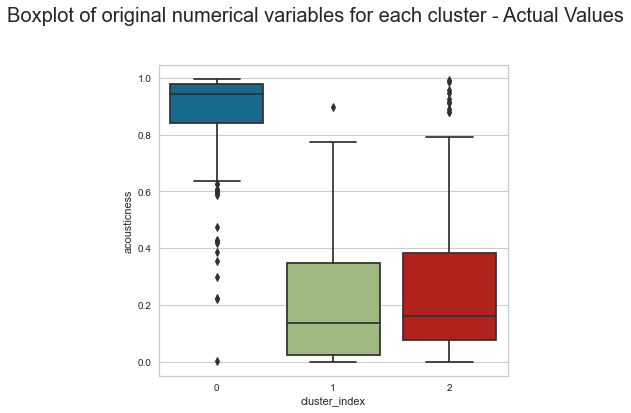

In [88]:
#visualize the boxplots for each segment for each feature for the data represented
#with actual values.
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster - Actual Values", fontsize=20)

sns.boxplot(data=cluster3_df, x="cluster_index", y="acousticness")

fig.tight_layout(pad=2.0)

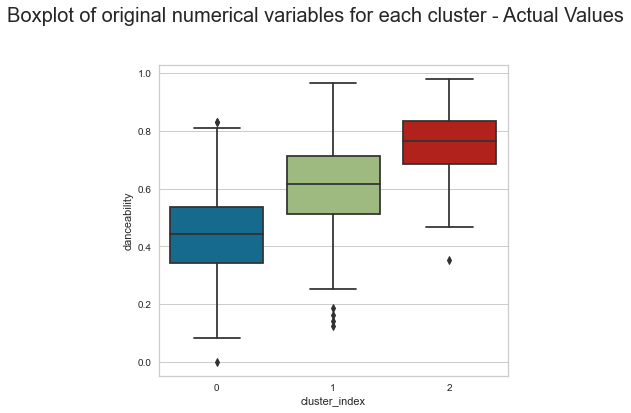

In [90]:
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster - Actual Values", fontsize=20)

sns.boxplot(data=cluster3_df, x="cluster_index", y="danceability")

fig.tight_layout(pad=2.0)

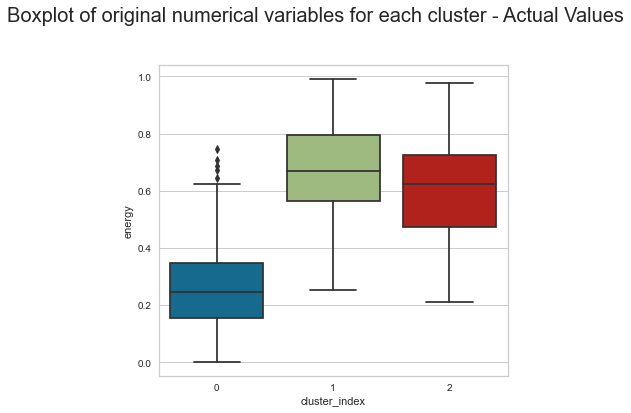

In [91]:
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster - Actual Values", fontsize=20)

sns.boxplot(data=cluster3_df, x="cluster_index", y="energy")

fig.tight_layout(pad=2.0)

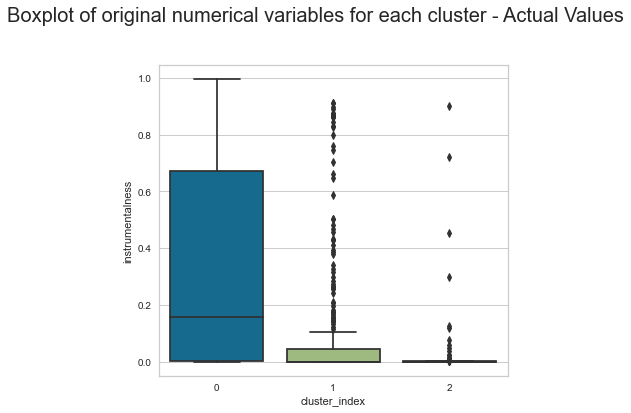

In [92]:
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster - Actual Values", fontsize=20)

sns.boxplot(data=cluster3_df, x="cluster_index", y="instrumentalness")

fig.tight_layout(pad=2.0)

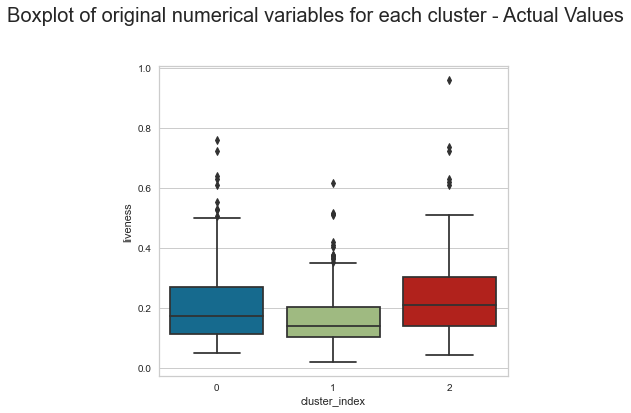

In [93]:
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster - Actual Values", fontsize=20)

sns.boxplot(data=cluster3_df, x="cluster_index", y="liveness")

fig.tight_layout(pad=2.0)

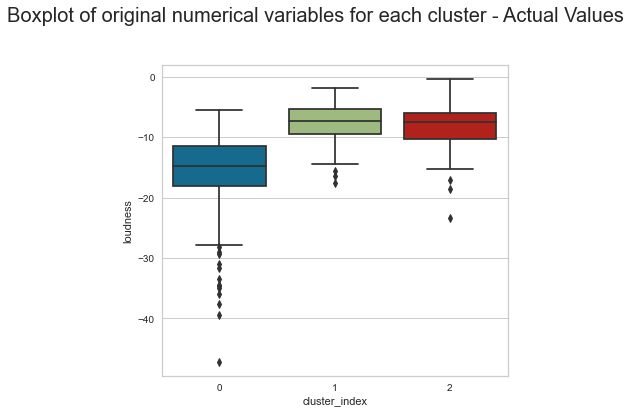

In [94]:
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster - Actual Values", fontsize=20)

sns.boxplot(data=cluster3_df, x="cluster_index", y="loudness")

fig.tight_layout(pad=2.0)

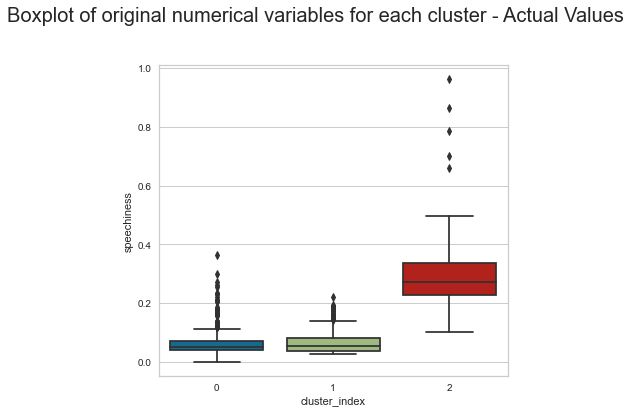

In [95]:
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster - Actual Values", fontsize=20)

sns.boxplot(data=cluster3_df, x="cluster_index", y="speechiness")

fig.tight_layout(pad=2.0)

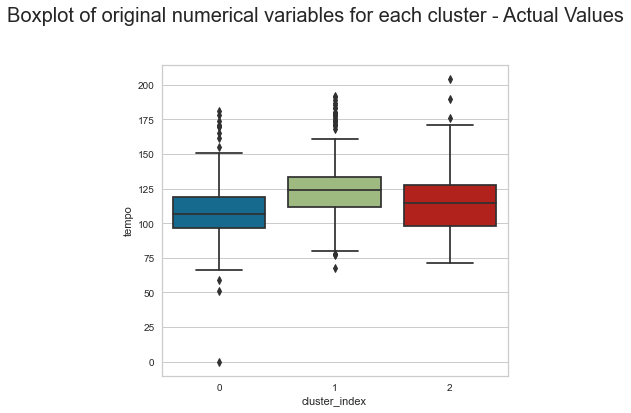

In [96]:
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster - Actual Values", fontsize=20)

sns.boxplot(data=cluster3_df, x="cluster_index", y="tempo")

fig.tight_layout(pad=2.0)

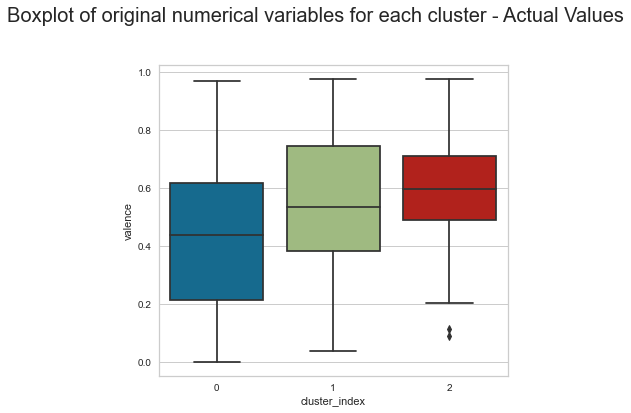

In [97]:
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster - Actual Values", fontsize=20)

sns.boxplot(data=cluster3_df, x="cluster_index", y="valence")

fig.tight_layout(pad=2.0)

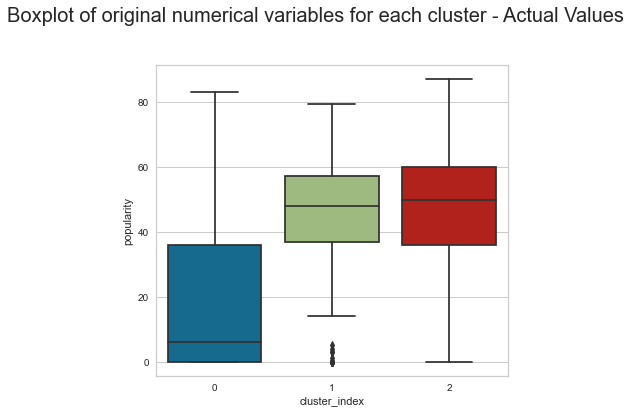

In [98]:
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster - Actual Values", fontsize=20)

sns.boxplot(data=cluster3_df, x="cluster_index", y="popularity")

fig.tight_layout(pad=2.0)

# Characteristic features of each clusters
Cluster 1 = (high) Acousticness, Instrumentalness (low) speechiness, popularity
Cluster 2 = (high) loudness, (low) instrumental, speechiness
Cluster 3 = (high) danceability, loudness, speechiness  (low) instrumental
*Cluster 2 & 3 have many overlapping features.
*From a featurewise point, Danceability is well separated.